<a href="https://colab.research.google.com/github/nabulago/TensorFlow-Course/blob/master/github_tensorflow_course_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [31]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Selectd images shape (28, 28)
1
(28, 28)
16
(28, 28)
5
(28, 28)
3
(28, 28)
19
(28, 28)
8
(28, 28)
18
(28, 28)
6
(28, 28)
23
(28, 28)
0
(28, 28)
Selected Images shape (28, 308)
Selected Images shape (27, 308)


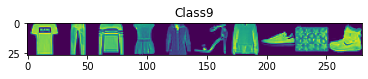

In [73]:
# get the index of single sample from every class
selected_images = np.zeros_like(train_images[0])
print('Selectd images shape',selected_images.shape)
selected_indexes = []
idx = 0
for val in sorted(list(set(train_labels))):
  idx = np.where(train_labels == val)[0][0]
  print(idx)
  selected_indexes.append(idx)
  print(train_images[idx].shape)
  selected_images=np.hstack([selected_images,train_images[idx,:,:]])
print('Selected Images shape',selected_images.shape)
selected_images = selected_images[1:]
print('Selected Images shape',selected_images.shape)
plt.figure()
plt.title('Class'+str(val))
plt.imshow(selected_images[:,28:])

label_dict = {0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

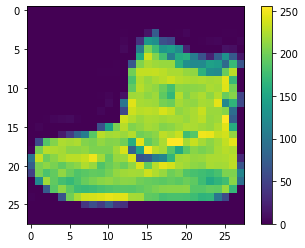

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images /255.
test_images = test_images / 255.

In [0]:
from keras.layers import Flatten, Dense
from keras import Sequential
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.5021 - accuracy: 0.8237
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3778 - accuracy: 0.8634
Epoch 3/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3358 - accuracy: 0.8771
Epoch 4/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3143 - accuracy: 0.8855
Epoch 5/5
60000/60000 [==============================] - 5s 92us/step - loss: 0.2940 - accuracy: 0.8916


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [19]:
print("Test loss: {}, Test Accuracy {}".format(test_loss, test_acc))

Test loss: 0.3510356022596359, Test Accuracy 0.8737000226974487


In [17]:
help(model.evaluate)

Help on method evaluate in module keras.engine.training:

evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.sequential.Sequential instance
    Returns the loss value & metrics values for the model in test mode.
    
    Computation is done in batches.
    
    # Arguments
        x: Input data. It could be:
            - A Numpy array (or array-like), or a list of arrays
              (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding
              array/tensors, if the model has named inputs.
            - A generator or `keras.utils.Sequence` returning
              `(inputs, targets)` or `(inputs, targets, sample weights)`.
            - None (default) if feeding from framework-native
              tensors (e.g. TensorFlow data tensors).
        y: Target data. Like the input data `x`,
            it co

In [0]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([7.6602046e-06, 2.1738710e-08, 5.8192845e-06, 8.4066113e-07,
       2.0002396e-06, 1.8250800e-03, 1.8145221e-05, 2.0792654e-02,
       1.4995656e-04, 9.7719783e-01], dtype=float32)

In [0]:
classes = model.predict_classes(test_images)

In [24]:
np.argmax(predictions,axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
np.argmax(predictions,axis=1).shape

(10000,)

In [27]:
len(test_images)

10000

In [75]:
np.argmax(predictions[0]),label_dict[test_labels[0]]

(9, 'Ankle boot')

9

In [0]:
predicted_class_labels = [label_dict[lblid] for lblid in list(np.argmax(predictions,axis=1))]

In [90]:
print(*zip( range(len(predicted_class_labels)),list(np.argmax(predictions,axis=1)), predicted_class_labels))

(0, 9, 'Ankle boot') (1, 2, 'Pullover') (2, 1, 'Trouser') (3, 1, 'Trouser') (4, 6, 'Shirt') (5, 1, 'Trouser') (6, 4, 'Coat') (7, 6, 'Shirt') (8, 5, 'Sandal') (9, 7, 'Sneaker') (10, 4, 'Coat') (11, 5, 'Sandal') (12, 7, 'Sneaker') (13, 3, 'Dress') (14, 4, 'Coat') (15, 1, 'Trouser') (16, 2, 'Pullover') (17, 2, 'Pullover') (18, 8, 'Bag') (19, 0, 'T-shirt/top') (20, 2, 'Pullover') (21, 5, 'Sandal') (22, 7, 'Sneaker') (23, 5, 'Sandal') (24, 1, 'Trouser') (25, 2, 'Pullover') (26, 6, 'Shirt') (27, 0, 'T-shirt/top') (28, 9, 'Ankle boot') (29, 4, 'Coat') (30, 8, 'Bag') (31, 8, 'Bag') (32, 3, 'Dress') (33, 3, 'Dress') (34, 8, 'Bag') (35, 0, 'T-shirt/top') (36, 7, 'Sneaker') (37, 5, 'Sandal') (38, 7, 'Sneaker') (39, 9, 'Ankle boot') (40, 0, 'T-shirt/top') (41, 1, 'Trouser') (42, 6, 'Shirt') (43, 7, 'Sneaker') (44, 6, 'Shirt') (45, 7, 'Sneaker') (46, 2, 'Pullover') (47, 1, 'Trouser') (48, 4, 'Coat') (49, 6, 'Shirt') (50, 4, 'Coat') (51, 2, 'Pullover') (52, 5, 'Sandal') (53, 8, 'Bag') (54, 2, 'Pullo

In [0]:
)